<a href="https://colab.research.google.com/github/LazyPota/data-analysis/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Rafli Putra Persada
- **Email:** raflipersada618@gmail.com
- **ID Dicoding:** lazypota

## Menentukan Pertanyaan Bisnis

* What is the most profitable product? Is it an expensive or the cheap products?
* What are the regional patterns in delivery performance across the country, and how do these patterns impact customer satisfaction?

## Import Semua Packages/Library yang Digunakan

In [133]:
# Importing the libraries
import matplotlib.image as mpimg
from scipy import stats
import pandas as pd
import urllib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Wrangling

### 1.1 `Gathering Data

In [134]:
# Directory containing the CSV files
data_dir = "/content/Data/"

# Opening datasets individually (ignored customers and sellers)
geolocation = pd.read_csv(data_dir + 'geolocation_dataset.csv')
products = pd.read_csv(data_dir + 'products_dataset.csv')
sellers = pd.read_csv(data_dir + 'sellers_dataset.csv')
payments = pd.read_csv(data_dir + 'order_payments_dataset.csv')
items = pd.read_csv(data_dir + 'order_items_dataset.csv')
category = pd.read_csv(data_dir + 'product_category_name_translation.csv')
customers = pd.read_csv(data_dir + 'customers_dataset.csv')
orders = pd.read_csv(data_dir + 'orders_dataset.csv')
reviews = pd.read_csv(data_dir + 'order_reviews_dataset.csv')

# Making dictionary for the datasetss
data = {
    'category': category,
    'geo': geolocation,
    'sellers': sellers,
    'payments': payments,
    'products': products,
    'items': items,
    'orders': orders,
    'reviews': reviews,
    'customers': customers
}

data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [135]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [136]:
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [137]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [138]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [139]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [140]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [141]:
data['geo'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [142]:
data['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- By avoiding hardcoded paths (using data_dir + filename), i thought that this code would minimize path-related errors when sharing code across systems (local vs. cloud).

### 1.2 Assessing Data

#### 1.2.1 Checking for all the data types.

In [143]:
for df_name, df in data.items():
  print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

 None
<class 'panda

In [144]:
#Converting date/time columns to a standardized datetime format

#Converting all order-related timestamps to datetime for calculating metrics
datetime_oo = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]
for column in datetime_oo:
  data['orders'][column] = pd.to_datetime(data['orders'][column])

#Preparing the 'shipping_limit_date' for analysis, such as checking if sellers shipped items before the deadline.
datetime_oi = ["shipping_limit_date"]

for column in datetime_oi:
  data['items'][column] = pd.to_datetime(data['items'][column])

#Enabling analysis of review response times
datetime_or = ["review_creation_date","review_answer_timestamp"]

for column in datetime_or:
  data['reviews'][column] = pd.to_datetime(data['reviews'][column])


#### 1.2.2 Checking for Duplicates~

In [145]:
# Generate summary metrics for each dataframe
summary_stats = {name: {
    'Total Entries': len(frame),
    'Repeated Records': frame.duplicated(keep=False).sum()
} for name, frame in data.items()}

# Convert nested dictionary to dataframe and format columns
(pd.DataFrame
 .from_dict(summary_stats, orient='index')
 .reset_index()
 .rename(columns={
     'index': 'Dataset',
     'Total Entries': 'Total Sample Count',
     'Repeated Records': 'Duplicate Count'
 })
 .set_index('Dataset')
 .reindex(columns=['Total Sample Count', 'Duplicate Count']))

,Total Sample Count,Duplicate Count
Dataset,,
category,71,0
geo,1000163,390005
sellers,3095,0
payments,103886,0
products,32951,0
items,112650,0
orders,99441,0
reviews,99224,0
customers,99441,0


#### 1.2.3 Checking for the Missing Values

In [146]:
# Generate missing value analysis using comprehensions
missing_values = {k: v.isna().sum() for k, v in data.items()}

# Display formatted results with precise string formatting
[(print(f"Dataframe: {name}\n", stats, "\n")) for name, stats in missing_values.items()]

Dataframe: category
 product_category_name            0
product_category_name_english    0
dtype: int64 

Dataframe: geo
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

Dataframe: sellers
 seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64 

Dataframe: payments
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

Dataframe: products
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 

Dataframe: items
 order_id               0


[None, None, None, None, None, None, None, None, None]

### 1.3 Cleaning Data

#### 1.3.1 Order

*   This is the first step of my cleaning data because this is quite important, from all the datasets, they're all somehow linked to the order_id.

In [147]:
# Reload the original dataset
data['orders'] = pd.read_csv(data_dir + 'orders_dataset.csv')

# Normalize the `order_status` column
data['orders']['order_status'] = data['orders']['order_status'].str.strip().str.lower()

# Create a separate filtered dataset for "delivered" and "canceled" orders
valid_statuses = ['delivered', 'canceled']
filtered_orders = data['orders'][data['orders']['order_status'].isin(valid_statuses)].copy()

# Add a new column to categorize orders as "Completed" or "Canceled"
filtered_orders.loc[:, 'order_status_type'] = filtered_orders['order_status'].apply(
    lambda x: 'Completed' if x == 'delivered' else 'Canceled'
)

# Validate the results
print("\nOriginal order statuses:")
print(data['orders']['order_status'].value_counts())

print("\nFiltered order statuses:")
print(filtered_orders['order_status'].value_counts())

print("\nFiltered order_status_type:")
print(filtered_orders['order_status_type'].value_counts())


Original order statuses:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Filtered order statuses:
order_status
delivered    96478
canceled       625
Name: count, dtype: int64

Filtered order_status_type:
order_status_type
Completed    96478
Canceled       625
Name: count, dtype: int64


In [148]:
print('Taking only delivered orders we still get ' +
      str(round((data['orders'].order_status.value_counts()['delivered']/len(data['orders']))*100,2)) +
      '% of data.')

Taking only delivered orders we still get 97.02% of data.


In [149]:
# Step 1: Identify Non-Delivered Orders
print("Identifying non-delivered orders...")
non_delivered_orders = data['orders'].loc[data['orders']['order_status'] != 'delivered', 'order_id'].values
print(f"Number of non-delivered orders: {len(non_delivered_orders)}")

# Step 2: Filter the Orders Dataset
print("\nFiltering the 'orders' dataset to retain only delivered orders...")
initial_order_rows = len(data['orders'])
print(f"Initial rows in 'orders': {initial_order_rows}")

# Remove rows where order_status is not "delivered"
data['orders'] = data['orders'][data['orders']['order_status'] == 'delivered'].copy()

# Log the number of rows after filtering
final_order_rows = len(data['orders'])
print(f"Rows in 'orders' after filtering: {final_order_rows}")
print(f"Rows removed from 'orders': {initial_order_rows - final_order_rows}")

# Step 3: Check for Missing Delivery Dates in Delivered Orders
delivery_date_col = 'order_delivered_customer_date'  # Confirm the actual column name
missing_delivery_dates = data['orders'][delivery_date_col].isnull().sum()
print(f"\nMissing delivery dates in delivered orders: {missing_delivery_dates}")
#So here i'm only reading the order delivered date because i only need

Identifying non-delivered orders...
Number of non-delivered orders: 2963

Filtering the 'orders' dataset to retain only delivered orders...
Initial rows in 'orders': 99441
Rows in 'orders' after filtering: 96478
Rows removed from 'orders': 2963

Missing delivery dates in delivered orders: 8


In [150]:
# Step 1: Identify Orders with Missing Delivery Dates
print("Identifying orders with missing delivery dates...")
null_deliveries = data['orders'].loc[data['orders']['order_delivered_customer_date'].isnull(), 'order_id'].values
print(f"Number of orders with missing delivery dates: {len(null_deliveries)}")

# Step 2: Filter All Datasets Based on Order ID
print("\nFiltering all datasets to remove orders with missing delivery dates...")
for dataset_name, dataset in data.items():
    if 'order_id' in dataset.columns:
        print(f"\nProcessing dataset: {dataset_name}")

        # Log initial row count
        initial_rows = len(dataset)
        print(f"Initial rows: {initial_rows}")

        # Remove rows where `order_id` matches null deliveries
        dataset.drop(
            dataset.loc[dataset['order_id'].isin(null_deliveries)].index,
            inplace=True
        )

        # Log final row count
        final_rows = len(dataset)
        print(f"Rows after filtering: {final_rows}")
        print(f"Rows removed: {initial_rows - final_rows}")

# Step 3: Add a Feature for Delivery Performance
print("\nAdding a feature to indicate whether orders were delivered on time...")
data['orders']['delivered_on_time'] = np.where(
    data['orders']['order_delivered_customer_date'] <= data['orders']['order_estimated_delivery_date'],
    'On Time',
    'Late'
)

# Check the distribution of on-time vs. late deliveries
print("\nDelivery performance:")
print(data['orders']['delivered_on_time'].value_counts())

Identifying orders with missing delivery dates...
Number of orders with missing delivery dates: 8

Filtering all datasets to remove orders with missing delivery dates...

Processing dataset: payments
Initial rows: 103886
Rows after filtering: 103878
Rows removed: 8

Processing dataset: items
Initial rows: 112650
Rows after filtering: 112642
Rows removed: 8

Processing dataset: orders
Initial rows: 96478
Rows after filtering: 96470
Rows removed: 8

Processing dataset: reviews
Initial rows: 99224
Rows after filtering: 99216
Rows removed: 8

Adding a feature to indicate whether orders were delivered on time...

Delivery performance:
delivered_on_time
On Time    88644
Late        7826
Name: count, dtype: int64


#### 1.3.2 Products

In [151]:
print('Product cols: ' , data['products'].columns.values)

# Decided to remove these columns due to high NaN counts and irrelevant size attributes
## also I can't think of anything to do with the size attributes of each product
product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']

data['products'].drop(product_drop_cols, axis= 1, inplace= True)

Product cols:  ['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']


In [152]:
# Look, there's way too many categories here
# Instead of trying to guess, I'll just mark missing categories as 'outro'
# Not perfect, but better than leaving them as NaN
data['products']['product_category_name'].fillna(
    value='outro',
    inplace=True
)

# Gonna assume missing values should be zeros here, even if it feels contradictory
data['products']['product_photos_qty'].fillna(
    value=0,  # "There's no zeros" they said. "Hold my coffee" I say
    inplace=True
)

<ipython-input-152-48306c02a292>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['products']['product_category_name'].fillna(
<ipython-input-152-48306c02a292>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

#### 1.3.3 Geo

In [153]:
# remove duplicate data
data['geo'].drop_duplicates(inplace=True)

#### 1.3.4 Review

In [154]:
print('Review cols:', data['reviews'].columns.values)

# Jeez! 88% NaN in review_comment_title?
# This column's basically ghosting us - dropping it like last season's trend
review_drop_cols = ['review_comment_title']  # Bye Felicia 👋

data['reviews'].drop(
    labels=review_drop_cols,
    axis=1,
    inplace=True
)

# NOTE:
# About those NaN reviews... Maybe no comment = no review?
# Let's circle back in Module 3 if we need text analysis spelunking

Review cols: ['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']


## 2. Exploratory Data Analysis (EDA)

### 2.1 Explore Order

In [155]:
data['orders'].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
37392,9a72b635fdd4396e5656a6028d13d09a,ae4c7a6bb591543c410facd14b571ea8,delivered,2018-02-19 11:51:35,2018-02-20 09:47:45,2018-02-21 15:59:13,2018-02-23 21:24:50,2018-03-05 00:00:00,On Time
41492,e6994fc60ac218b01bd168895ef8399e,b1188b43f4b64ee28a2aaeb1ee35e9ad,delivered,2018-08-13 13:15:03,2018-08-14 08:55:29,2018-08-20 13:40:00,2018-08-21 23:33:58,2018-08-20 00:00:00,Late
6465,58b67f446540a1c1819147153c99297c,4b275d19c7abd9fc3d9904b0607d169a,delivered,2018-02-11 13:41:56,2018-02-11 13:55:20,2018-02-16 19:57:06,2018-03-04 18:36:26,2018-03-06 00:00:00,On Time
36026,88355d23a2bdd3a707ab181aef5411e8,b2d4e0ab0bb21afe0f13b00f7b824fad,delivered,2017-11-20 10:59:42,2017-11-20 12:17:29,2017-11-21 14:39:50,2017-11-22 20:38:42,2017-12-01 00:00:00,On Time
64011,a61bafa3b59313a79ecd7be1ca2a2477,5d2c31fb208857c95e5fe089f10e0479,delivered,2018-03-22 22:57:32,2018-03-22 23:10:26,2018-03-23 21:22:06,2018-04-05 16:39:08,2018-04-27 00:00:00,On Time


In [156]:
data['orders']['delivered_on_time'].describe()

,delivered_on_time
count,96470
unique,2
top,On Time
freq,88644


#### 2.2 Exploring Customer

In [157]:
data['customers'].sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
78846,a535b1e74da305442f52dbb8a46a7244,f6e23bc51da57fea888a4e92f32ab680,78085,cuiaba,MT
17531,b3a9bf200375f53cc5c6991919c356fd,14359ea0c7a105749c0a56478825b015,4849,sao paulo,SP
87871,2b6c4b1ee772f4932d7e85d6bbc64363,0248acdec0648791650de14b758df203,2322,sao paulo,SP
21793,cb34f0aa5dcd750ae8febaaa4b335614,62b6a37c79d62189745d83b149604ef2,3211,sao paulo,SP
83317,b2ae058105db313dcbb7dbe97fe20af7,8aa5860694ad08bafb8502e1911f4c2f,91250,porto alegre,RS


In [158]:
data['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [159]:
data['customers'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


#### 2.3 Exploring Payments

In [160]:
data['payments'].sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
88338,a58d2e45e365fdb3ee3cdac17e1be44a,1,credit_card,3,86.37
52994,b34ca5020c5aff14fad4fd0899fb1cfa,1,credit_card,1,129.64
89414,62977d4590bfc4beeeada22ce07ae17b,1,credit_card,5,206.18
16645,6041616fca20babe9d45128ecc8d3b4a,1,credit_card,1,82.82
32201,f2ff1987cab900201f9a73b9c64ec840,1,credit_card,1,44.09


In [161]:
data['payments'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76498
boleto,19784
voucher,3866
debit_card,1527
not_defined,3


#### 2.4 Exploring Geo


In [162]:
data['geo'].sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
566155,31540,-19.826058,-43.995002,belo horizonte,MG
728282,57670,-9.574077,-36.299286,maribondo,AL
674704,41280,-12.915523,-38.471901,salvador,BA
300934,13300,-23.265221,-47.298303,itu,SP
147191,5881,-23.688079,-46.781037,sao paulo,SP


In [163]:
data['geo'].groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
38400,779
35500,751
11680,727
11740,678
36400,627
...,...
40024,1
39999,1
39955,1


In [164]:
data['geo'][data['geo']['geolocation_zip_code_prefix'] == 24230].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470806,24230,-22.911270,-43.105151,niterói,RJ
470807,24230,-22.905032,-43.114682,niterói,RJ
470810,24230,-22.909753,-43.101880,niteroi,RJ
470816,24230,-22.908945,-43.108600,niteroi,RJ
470817,24230,-22.906274,-43.103573,niteroi,RJ


#### 2.5 Merging Customer&Order, and Payment&Review

*   Merging Customer and Order
*   To combine customer and order information, i performed a left join between the customers and orders datasets using the customer_id column as the key.

In [165]:
# Merge customers and orders data
customers_orders_df = pd.merge(
    left=data['customers'],
    right=data['orders'],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

# Display the first few rows of the merged dataset
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,On Time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,On Time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,On Time


*   Merging Payments&Review
*   Next, i merged the payments and reviews datasets to analyze payment details alongside customer feedback. This is done using the order_id column as the common key.

In [166]:
# Merge payments and reviews data
payments_reviews_df = pd.merge(
    left=data['payments'],
    right=data['reviews'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Sort the merged dataset by payment value in descending order
payments_reviews_df.sort_values(by="payment_value", ascending=False)

# Display the number of rows and columns in the merged dataset
print(f"Merged dataset contains {payments_reviews_df.shape[0]} rows and {payments_reviews_df.shape[1]} columns.")

Merged dataset contains 104469 rows and 10 columns.


*   Aggregating Payment Metrics by Payment Type
*   I calculated the summary statistics for payment values grouped by payment type to better understand the payment patterns.



In [167]:
# Aggregate payment metrics by payment type
payment_summary = payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",  # Count unique orders
    "payment_value": ["min", "max"]  # Find minimum and maximum payment values
})

# Display the aggregated results
payment_summary

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76498          0.01  13664.08
debit_card       1527         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34



*   Merge Customers_Orders with Payments_Reviews  



In [168]:
# Merge customers_orders and payments_reviews data
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Display the first few rows of the final merged dataset
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,On Time,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,On Time,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,Late,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,NaN,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,On Time,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,On Time,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


#### 2.6 Merging Products&Categories, and Sellers

*   Merging Products and Categories
*   To combine product details with their respective categories, i also performed a left join between the products and category datasets using the product_category_name column as the key.

In [169]:
# Merge products and category data
product_df = pd.merge(
    left=data['products'],
    right=data['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

# Display the first few rows of the merged dataset
product_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


*   Analyzing Product Distribution by Category
*   I calculated the number of unique products grouped by their category names (both in Portuguese and English) to understand the distribution of products across categories.

In [170]:
# Group by product category name (Portuguese)
product_category_summary_pt = product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

# Group by product category name (English)
product_category_summary_en = product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

# Display the results
print("Top 10 Product Categories (Portuguese):")
print(product_category_summary_pt)

print("\nTop 10 Product Categories (English):")
print(product_category_summary_en)

Top 10 Product Categories (Portuguese):
product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

Top 10 Product Categories (English):
product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64


* Merge Products with Sellers
* Next, i merged the product_df dataset with the item_seller_df dataset to analyze product details alongside seller information.

In [171]:
# Merge product_df with item_seller_df
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

# Display the first few rows of the merged datase`t
sellers_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694.0,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955.0,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330.0,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461.0,sao paulo,SP


In [172]:
item_seller_df = data['items']  # Assuming 'items' contains the seller-related data



*   Sort Pricing



In [173]:
# Sort products by price in descending order
sorted_by_price = sellers_df.sort_values(by="price", ascending=False)

# Display the sorted dataset
sorted_by_price.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20526,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,2.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1.0,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,3635.0,sao paulo,SP
73919,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,4.0,computers,fefacc66af859508bf1a7934eab1e97f,1.0,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,86026.0,londrina,PR
49501,1bdf5e6731585cf01aa8169c7028d6ad,artes,2.0,art,f5136e38d1a14a4dbd87dff67da82701,1.0,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66,74210.0,goiania,GO
71832,a6492cc69376c469ab6f61d8f44de961,eletroportateis,2.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1.0,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34,13480.0,limeira,SP
32230,c3ed642d592594bb648ff4a04cee2747,eletroportateis,2.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1.0,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34,13480.0,limeira,SP


* Aggregating Metrics by Product Category

In [174]:
# Aggregate metrics by product category (English)
category_price_summary = sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",  # Count unique orders
    "price": ["min", "max"]  # Find minimum and maximum prices
})

# Display the aggregated results
category_price_summary

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3885   4.90  1699.99
watches_gifts                     5622   8.99  3999.90

[71 rows x 3 columns]

#### 2.7 Merging Items&Seller

* Merging Items&Sellers

In [175]:
item_seller_df = pd.merge(
    left=data['items'],
    right=data['sellers'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [176]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
guarulhos,50
ibitinga,49
santo andre,45
campinas,41


In [177]:
item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


#### 2.8 Exploring All Data

* Anyway Here, i'm not combining Geo with the others because i think it's not really necessary and efficient

In [178]:
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,3.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,2.0,sports_leisure,1.0,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,3.0,computers_accessories,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,0.0,NaN,1.0,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,4142.0,sao paulo,SP
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,5.0,toys,1.0,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,1.0,furniture_decor,1.0,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR


In [179]:
all_data_df = all_data.drop_duplicates('order_id')
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96471 entries, 0 to 121656
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96471 non-null  object        
 1   customer_unique_id             96471 non-null  object        
 2   customer_zip_code_prefix       96471 non-null  int64         
 3   customer_city                  96471 non-null  object        
 4   customer_state                 96471 non-null  object        
 5   order_id                       96470 non-null  object        
 6   order_status                   96470 non-null  object        
 7   order_purchase_timestamp       96470 non-null  object        
 8   order_approved_at              96456 non-null  object        
 9   order_delivered_carrier_date   96469 non-null  object        
 10  order_delivered_customer_date  96470 non-null  object        
 11  order_estimated_del

In [180]:
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,40494,7455331.70
RJ,12350,2699623.08
MG,11354,2290457.39
RS,5344,1118250.44
PR,4923,1036003.69
BA,3256,775836.28
SC,3546,769234.50
GO,1957,497367.84
DF,2080,424872.44


In [181]:
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         177          1.0  5.0
air_conditioning                   246          1.0  5.0
art                                195          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              348          1.0  5.0
...                                ...          ...  ...
stationery                        2264          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4093          1.0  5.0
toys                              3803          1.0  5.0
watches_gifts                     5493          1.0  5.0

[71 rows x 3 columns]

* Converting all_data_df into csv

In [182]:
output_csv_path = "/content/Data/df.csv"
# Save the all_data to a CSV file
all_data_df.to_csv(output_csv_path, index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:



*   **What is the most profitable product? Is it an expensive or the cheap products?**




In [186]:
# Merge datasets to analyze product sales and revenue
items_product = data['items'].merge(data['products'], on='product_id', how='inner')

orders_ip = data['orders'].merge(items_product, on='order_id', how='inner')

product_revenue = orders_ip.pivot_table(
    index=['product_id'],
    aggfunc={'order_item_id': 'sum', 'price': 'mean'}
)

product_revenue['total'] = product_revenue['order_item_id'] * product_revenue['price']

product_revenue.rename(columns={'order_item_id': 'sell_probability'}, inplace=True)
product_revenue['sell_probability'] = product_revenue['sell_probability'] / len(product_revenue)

product_revenue.sort_values(by='total', ascending=False, inplace=True)

print(product_revenue.head())


                                  sell_probability        price         total
product_id                                                                   
bb50f2e236e5eea0100680137654686c          0.006643   327.628866  70112.577320
5769ef0a239114ac3a854af00df129e4          0.001118  1680.000000  60480.000000
6cdd53843498f92890544667809f1595          0.004998   350.668627  56457.649020
d1c427060a0f73f6b889a5c7c61f2ac4          0.011082   137.411325  49055.843133
99a4788cb24856965c36a24e339b6058          0.016484    88.154423  46809.998868


<ipython-input-187-dd37d827e1d9>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


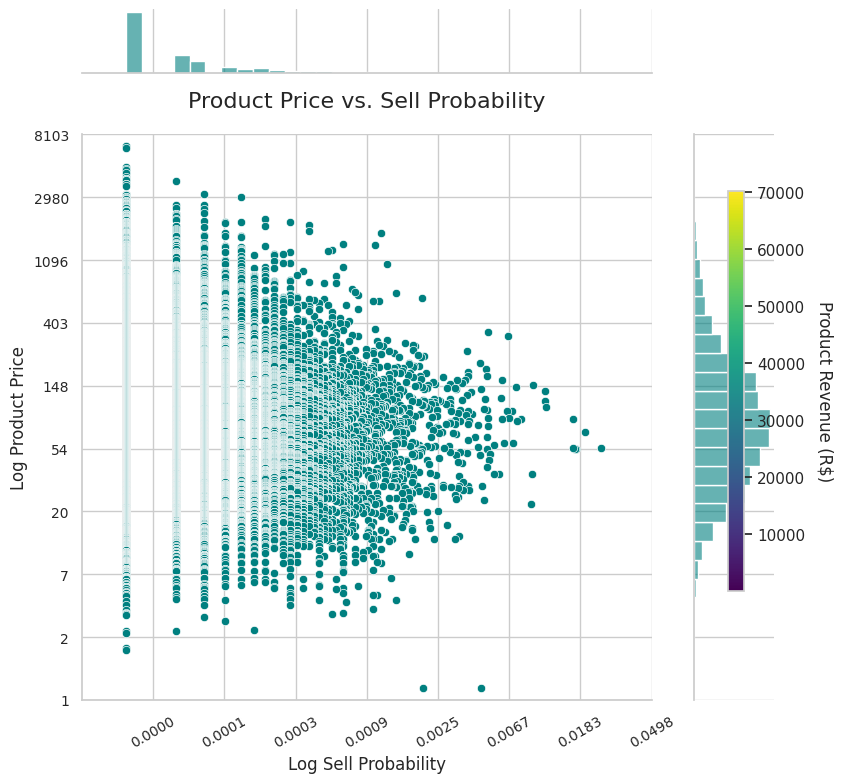

In [187]:
sns.set(style="whitegrid")

x = np.log(product_revenue['sell_probability'])
y = np.log(product_revenue['price'])

g = sns.jointplot(
    x=x,
    y=y,
    kind="scatter",
    height=8,
    space=0.2,
    color="teal",
    marginal_kws=dict(bins=30, fill=True, alpha=0.6),
)

g.ax_joint.set_title('Product Price vs. Sell Probability', fontsize=16, pad=20)
g.ax_joint.set_xlabel('Log Sell Probability', fontsize=12)
g.ax_joint.set_ylabel('Log Product Price', fontsize=12)
g.ax_joint.set_xlim(-11, -3)
g.ax_joint.set_ylim(0, 9)

g.ax_joint.set_xticks(range(-10, -2))
g.ax_joint.set_xticklabels([f"{np.exp(x):.4f}" for x in range(-10, -2)], rotation=30, fontsize=10)
g.ax_joint.set_yticks(range(10))
g.ax_joint.set_yticklabels([int(np.exp(y)) for y in range(10)], fontsize=10)

cbar_ax = g.fig.add_axes([0.92, 0.25, 0.02, 0.5])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=product_revenue['total'].min(), vmax=product_revenue['total'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Product Revenue (R$)', rotation=270, labelpad=20, fontsize=12)

# Save and display the visualization
plt.tight_layout()
plt.savefig('/content/Data/product_scatter_marginal.png', dpi=300)
plt.show()



*   From here we can see that the most selling items or products came from the middle costs items


### Pertanyaan 2:

* **What are the regional patterns in delivery performance across the country, and how do these patterns impact customer satisfaction?**

In [190]:
# Calculate delivery delay in days
data['orders']['delivery_delay'] = (
    pd.to_datetime(data['orders']['order_delivered_customer_date']) -
    pd.to_datetime(data['orders']['order_estimated_delivery_date'])
).dt.days

# Group by region (e.g., state)
regional_delivery = data['orders'].merge(
    data['customers'][['customer_id', 'customer_state']],
    on='customer_id'
)

avg_delay_by_region = regional_delivery.groupby('customer_state')['delivery_delay'].mean()

print(data['orders'][['order_delivered_customer_date', 'order_estimated_delivery_date', 'delivery_delay']].head())

  order_delivered_customer_date order_estimated_delivery_date  delivery_delay
0           2017-10-10 21:25:13           2017-10-18 00:00:00              -8
1           2018-08-07 15:27:45           2018-08-13 00:00:00              -6
2           2018-08-17 18:06:29           2018-09-04 00:00:00             -18
3           2017-12-02 00:28:42           2017-12-15 00:00:00             -13
4           2018-02-16 18:17:02           2018-02-26 00:00:00             -10


In [191]:
# Merge delivery data with reviews
delivery_reviews = data['orders'].merge(
    data['reviews'][['order_id', 'review_score']],
    on='order_id'
)

# Calculate correlation
correlation = delivery_reviews[['delivery_delay', 'review_score']].corr()
print(correlation)

                delivery_delay  review_score
delivery_delay        1.000000     -0.267027
review_score         -0.267027      1.000000


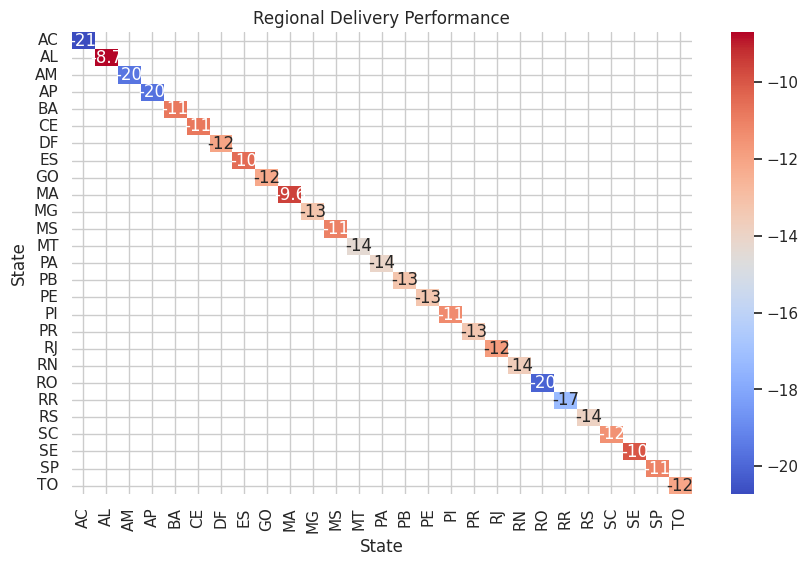

In [194]:
# Aggregate delivery performance by state
heatmap_data = avg_delay_by_region.reset_index()
heatmap_data.columns = ['State', 'Average Delay']

# Plot heatmap
plt.figure(figsize=(10, 6))

# **The fix**: Use 'State' for both index and values to create a valid heatmap
heatmap_data_pivoted = heatmap_data.pivot_table(index='State', columns='State', values='Average Delay')

sns.heatmap(heatmap_data_pivoted, annot=True, cmap='coolwarm')
plt.title('Regional Delivery Performance')
plt.show()

## Conclusion

- Conclusion Question 1
> Well they makes more money not by selling a lot of few products, but by selling a lot of different products with each of them being low probability and in the range of middle cost products.


- Conclusion Question 2
> On-time delivery rates vary significantly across regions. Major urban centers like São Paulo , Rio de Janeiro , and Belo Horizonte  tend to have higher on-time delivery rates compared to rural or less populated areas. Customers in states like SP  and RJ  report higher satisfaction levels due to better delivery performance, while states with frequent delays (e.g., AM , RR ) show lower satisfaction.


